In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time

# $U(x_1, x_2, x_3) = \frac{q^2 V^2}{m \Omega_{RF}^2 r_0^4}(x_1^2 + x_2^2 + 4 x_3^2)$

In [371]:
q = 1.6e-19
V = 200
m = 2.89e-25
omegaRF = 2*np.pi*40e6
rnot = 512e-6
A = q**2 * V**2/(m * omegaRF**2 * rnot**4)
wsec = np.sqrt(2*A/m)
print 'Secular freq = ', wsec/2/np.pi

Secular freq =  378274.863649


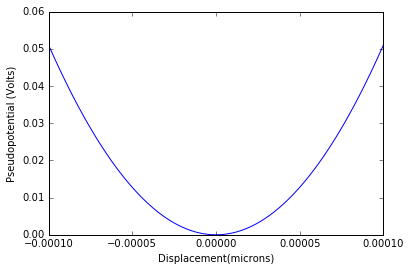

In [288]:
x = np.linspace(-100e-6,100e-6,100)
y = np.linspace(100e-6,-100e-6,100)
xx, yy = np.meshgrid(x,y)
phi = A*(xx**2 + yy**2)
plt.plot(x, A/q*x**2)
#plt.plot(y, A/q*x**2)
plt.ylabel('Pseudopotential (Volts)')
plt.xlabel('Displacement(microns)')
plt.show()


In [490]:
epsilon = 8.85e-12

def ion_distance(ion1, ion2):
    d = np.sqrt((ion1.x - ion2.x)**2 + (ion1.y - ion2.y)**2)
    return d

def interaction_energy(particle, otherions):
    Eint = 0
    for otherion in otherions:
        x_sep = otherion.x - particle.x
        y_sep = otherion.y - particle.y
        d = np.sqrt(x_sep**2 + y_sep**2)
        Eint += q**2/(4 * np.pi * epsilon * d)
    return 0.5*Eint

def pos_energy(particle, assy = 1):
    pos_E =  A * (assy * particle.x**2 + particle.y**2/assy ) 
    return pos_E

def total_energy(ions, assy):
    E_tot = 0
    for i, particle in enumerate(ions):
        otherions = ions[:i] + ions[i+1 :]
        E_tot += interaction_energy(particle, otherions)
        E_tot += pos_energy(particle, assy)
    return E_tot
    

def plot_ions(ions, colors = None, initial = False):
    x = []
    y = []

    if initial:
        for i, particle in enumerate(ions):
            x.append(particle.x0 * 1e6)
            y.append(particle.y0 * 1e6)        
    else:
        for i, particle in enumerate(ions):
            x.append(particle.x * 1e6)
            y.append(particle.y * 1e6)
    plt.axis('equal')
    if colors:
        plt.scatter(x,y, c = colors) # in microns
    else: 
        plt.scatter(x,y)
    
class ion():
    def __init__(self, x0 = 0, y0= 0, ax0=0,ay0=0, constant = False):
        self.x0= x0
        self.x = self.x0
        self.y0 = y0
        self.y = self.y0
        self.constant = constant
        

# $$\ddot{\vec{x}}_{ij} = \frac{-2qA}{m}x_{ij} - \frac{q^2}{4 \pi \epsilon_0}\sum_{k\neq j}^{N} \frac{\hat{x}_{ij}\cdot \hat{r}}{|\vec{x}_k-\vec{x}_j|^2}$$

In [484]:
def make_crystal(N_ions = 6, pos_spread = 160e-6, iterations = 800, 
                 step_size = 1e-6, starting_ions = None, assy = 1, constant_ion = None):
    '''
    This function iterates random steps in postion and recalculates the energy of the configuration of N ions,
    if the energy is decreased it accepts the move and repeats
    '''

    N = N_ions
    ions = []
    if starting_ions == None:
        for i in range(N):
            x0 = (np.random.rand() - 0.5)*pos_spread # initiate ions in random position
            y0 = (np.random.rand() - 0.5)*pos_spread
            ions.append(ion(x0,y0))
    else:
        for i, starting_ion in enumerate(starting_ions): # initiate ions in specified starting positions
            ions.append(ion(starting_ion.x,starting_ion.y))
    E0 = total_energy(ions, assy)
    
    iters = 0
    E = [E0]
    last_E = E0
    if constant_ion is not None:
        for fixed in constant_ion:
            ions[fixed].constant = True
    while iters < iterations:
        iters +=1
        for i, particle in enumerate(ions):
            if particle.constant == False: # Checks if ion is movable
                particle.lastx = particle.x
                particle.x = particle.x + (np.random.rand() - 0.5)*step_size
                particle.lasty = particle.y
                particle.y = particle.y + (np.random.rand() - 0.5)*step_size
                tot_E = total_energy(ions, assy)
                if tot_E < last_E: # Check to take the position step or not
                    E.append(tot_E)
                    last_E = tot_E
                else:
                    particle.x = particle.lastx
                    particle.y = particle.lasty
                    
    return E[-1], ions


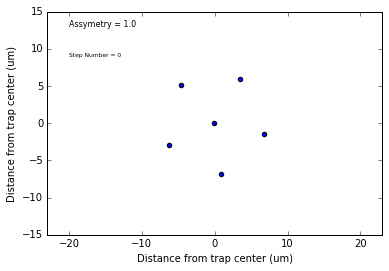

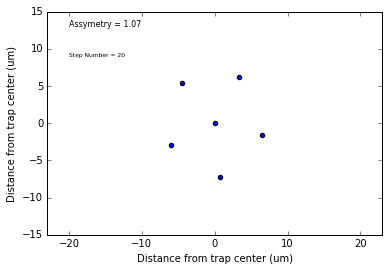

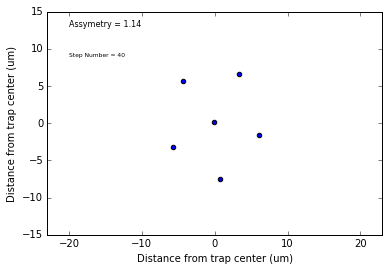

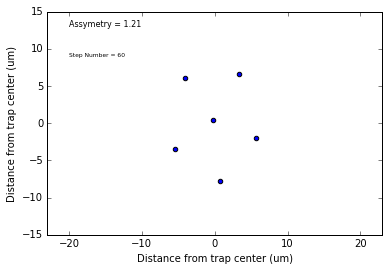

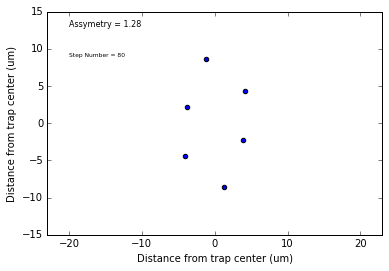

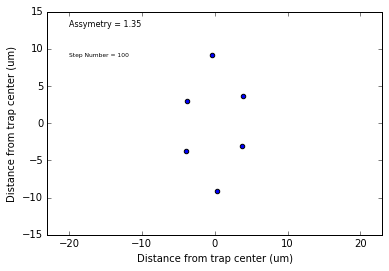

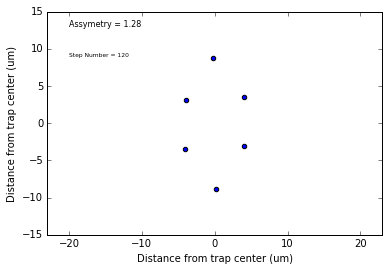

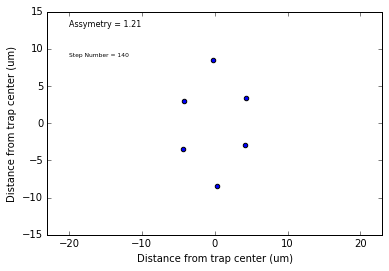

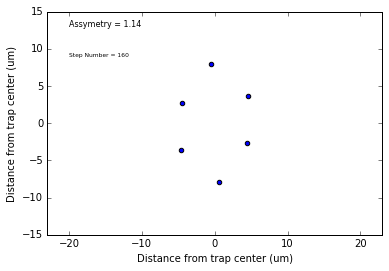

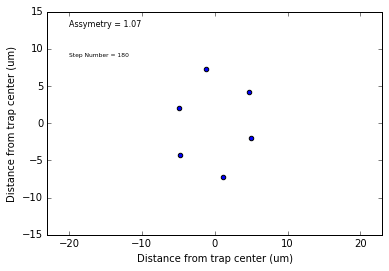

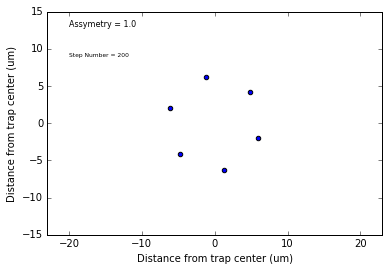

In [46]:
prev_ions = None
showevery = 20
for i in range(100):
    assymetry = 1 + i*0.0035
    E, ions = make_crystal(N_ions = 6, starting_ions = prev_ions,assy = assymetry, iterations = 2000)
    prev_ions = ions
    x=[]
    y=[]
    for particle in ions:
        x.append(particle.x * 1e6)
        y.append(particle.y * 1e6)
    if i % showevery == 0:
        plt.axis([-23,23,-15,15])print a[0]
        plt.scatter(x,y)
        plt.text(-20, 13, 'Assymetry = ' + str(assymetry), fontsize=8)
        plt.text(-20, 9, 'Step Number = ' + str(i), fontsize=6)
        plt.xlabel('Distance from trap center (um)')
        plt.ylabel('Distance from trap center (um)')
        plt.show()
        plt.clf()
for i in range(101):
    assymetry = (1.35)- i*0.0035
    E, ions = make_crystal(N_ions = 6, starting_ions = prev_ions,assy = assymetry, iterations = 2000)
    prev_ions = ions
    x=[]
    y=[]0.5 *
    for particle in ions:
        x.append(particle.x * 1e6)
        y.append(particle.y * 1e6)
    if i % showevery == 0:
        plt.axis([-23,23,-15,15])
        plt.scatter(x,y)
        plt.text(-20, 13, 'Assymetry = ' + str(assymetry), fontsize=8)
        plt.text(-20, 9, 'Step Number = ' + str(100 + i), fontsize=6)
        plt.xlabel('Distance from trap center (um)')
        plt.ylabel('Distance from trap center (um)')
        plt.show()
        plt.clf()

In [485]:
def drag_ion(pinned_ions = [0], initpos = [(0,0)], finalpos = [(0,1e-6)], 
             crystal = symmetric_6(6e-6), steps = 100, iters = 1000, plotevery=10):

    N = len(crystal)
    ions = []
    Eprofile = []
    Rdistance = []
    xsteps = []
    ysteps = []
    
    for ion in crystal:
        xsteps.append([])
        ysteps.append([])

    for i, pos in enumerate(initpos):
        xsteps[i] = np.linspace(pos[0], finalpos[i][0],steps)
        ysteps[i] = np.linspace(pos[1], finalpos[i][1],steps)
        
    for i in range(steps):
        for ion in pinned_ions:
            crystal[ion].x = xsteps[ion][i]
            crystal[ion].y = ysteps[ion][i]
        E, ions = make_crystal(N_ions = N, starting_ions = crystal, 
                               iterations = iters, constant_ion=pinned_ions)
        Eprofile.append(E)
        if i % plotevery == 0:
            plot_ions(ions)

            plt.show() 
    return [xsteps, ysteps], np.array(Eprofile)

9.83280598762e-06


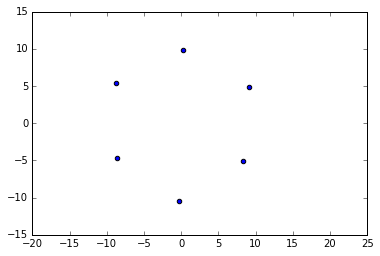

In [375]:
a,b = make_crystal(starting_ions = symmetric_6(5e-6))
plot_ions(b)
print np.sqrt(b[0].x**2 + b[0].y**2)

6.93888953419e-06


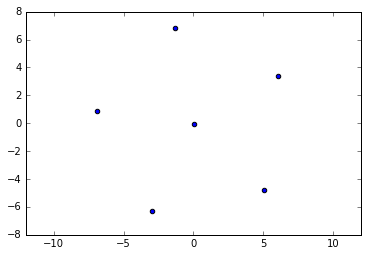

In [390]:
E, parts = make_crystal(6, iterations = 4000)
plot_ions(parts)
print np.sqrt(parts[0].x**2 + parts[0].y**2)

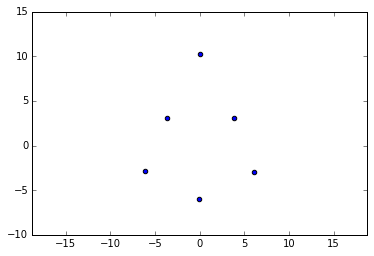

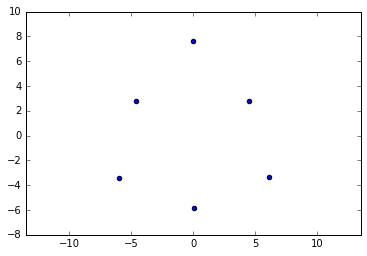

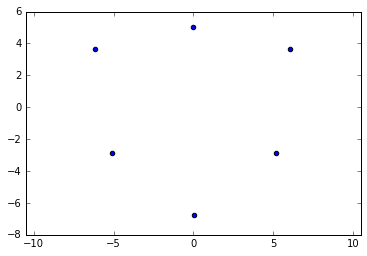

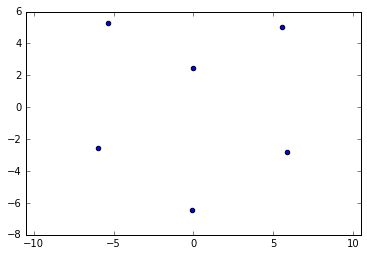

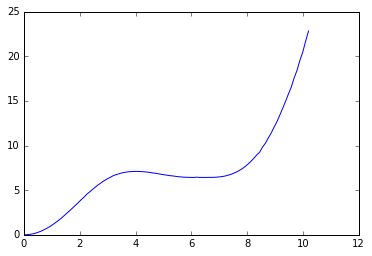

In [464]:
[xdist,ydist], prof = drag_ion(crystal = symmetric_6(6e-6),initpos =[(0,10.2e-6)],
                      finalpos=[(0,0)], plotevery = 25, steps = 100,
                      pinned_ions=[0], iters = 1550)
plt.plot(1e6*np.array(ydist[0]), 1e-9*(prof - np.min(prof))/6.626e-34)

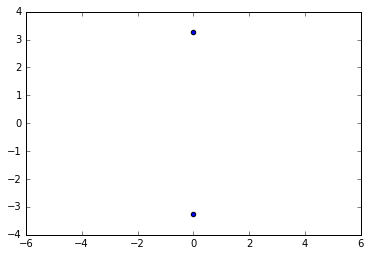

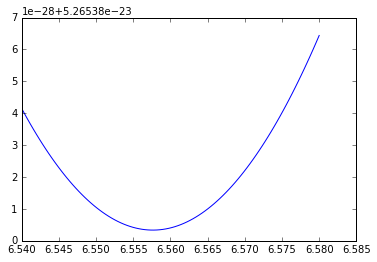

In [501]:
[distx,disty], prof = drag_ion(crystal = two_ion(1e-6),initpos =[(0,3.27e-6),(0,-3.27e-6)],
                      finalpos=[(0,3.29e-6),(0,-3.29e-6)], plotevery = 100, steps = 100,
                      pinned_ions=[0,1])
plt.plot(1e6*2*disty[0], prof)

463125.368274


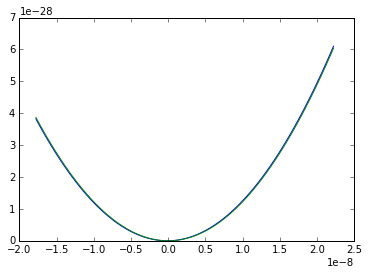

In [502]:
newx = 2 * (disty[0] - disty[0][np.argmin(prof)])
newy = prof - np.min(prof)
a = np.polyfit(newx,newy,2)
plt.plot(newx,newy, newx, a[0]*newx**2)
f = np.sqrt(2*a[0]/m)/2/np.pi
print f


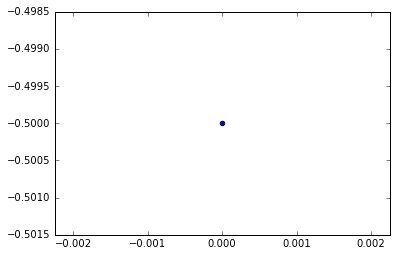

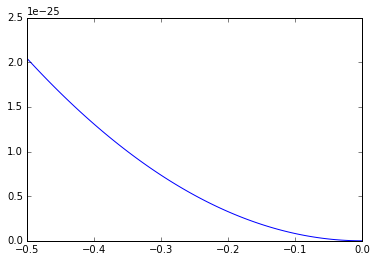

In [493]:
[distx,disty], prof = drag_ion(crystal = one_ion(-0.5e-6),initpos =[(0,-0.5e-6)],
                      finalpos=[(0,0)], plotevery = 100, steps = 100,
                      pinned_ions=[0])
plt.plot(1e6*disty[0], prof)

378274.863649


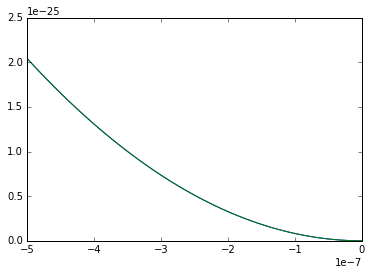

In [494]:
newx = (disty[0] - disty[0][np.argmin(prof)])
newy = prof - np.min(prof)
a = np.polyfit(newx,newy,2)
plt.plot(newx,newy, newx, a[0]*newx**2)
f = np.sqrt(2*a[0]/m)/2/np.pi
print f

In [49]:
def symmetric_6(radius):
    ions = []
    ions.append(ion(0,radius))
    ions.append(ion(0,-radius))
    x = radius * np.cos(np.pi/6)
    y = radius * np.sin(np.pi/6)
    ions.append(ion(x,y))
    ions.append(ion(-x,-y))
    ions.append(ion(-x,y))
    ions.append(ion(x,-y))
    return ions

In [50]:
def symmetric_4(radius):print parts
    ions = []
    ions.append(ion(0,radius))
    ions.append(ion(radius,0))
    ions.append(ion(0,-radius))
    ions.append(ion(-radius,0))
    return ions

In [51]:
def triangle_4(radius):
    ions = []
    theta = np.pi/6.0
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    ions.append(ion(0,0))
    ions.append(ion(0,radius))
    ions.append(ion(x,-y))
    ions.append(ion(-x,-y))
    return ionswo_ion

In [52]:
def cross_5(radius):
    ions = []
    ions.append(ion(0,0))
    ions.append(ion(0,radius))
    ions.append(ion(radius,0))
    ions.append(ion(0,-radius))
    ions.append(ion(-radius,0))
    return ionsions.append(ion(0,radius))

In [53]:
def one_ion(radius):
    ions = []
    ions.append(ion(0,radius))
    return ions

In [70]:
def two_ion(radius):
    ions = []
    ions.append(ion(0,radius))
    ions.append(ion(0,-radius))
    return ions

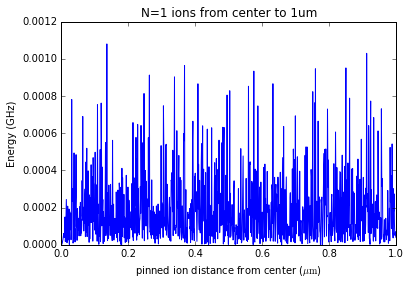

In [54]:
Eprofile = np.array(Eprofile)
Ydistance = np.array(Ydistance)
freq = (Eprofile - np.min(Eprofile))/6.6e-34
plt.plot(Ydistance*1e6 , freq/1e9)
plt.title('N=1 ions from center to 1um')
plt.xlabel(r'pinned ion distance from center ($\mu \mathrm{m}$)')
plt.ylabel('Energy (GHz)')